In [2]:
import sys
sys.path.append('C:/Users/kupec/OneDrive/Desktop/neuroforest-main/neuroforest-master')
from typing import List
from pathlib import Path

import json
import re
import numpy as np
from tqdm import tqdm

from neuroforest.dataset import dataloader, TimeStampedCoordinates, SESSION_TYPES, Coordinates

import matplotlib.pyplot as plt


In [3]:
def to_vect(coordinates: List[Coordinates]) -> np.ndarray:
    return np.array([coord.to_vect() for coord in coordinates])


def get_idle_segments_lengths(player_coords: List[TimeStampedCoordinates]) -> list[int]:
    coords = to_vect([c["coord"] for c in player_coords])
    deriv = coords[1:] - coords[:-1]
    player_dist = np.linalg.norm(deriv, axis=1)
    zero_indices = np.where(player_dist == 0)[0]
    zero_indices_segments = np.split(zero_indices, np.where(np.diff(zero_indices) != 1)[0] + 1)
    return [a.shape[0] for a in zero_indices_segments]

all_lengths = []
for sample in dataloader:
    for session_type in SESSION_TYPES:
        trial = sample[session_type]
        if trial is not None:
            print(f"{sample.subject_name} - {session_type}")
            all_lengths += get_idle_segments_lengths(trial.player_coords)

Angela - patchy
Angela - first
Angela - uniform
Thelma - patchy
Thelma - first
Thelma - uniform
Dylan - patchy
Dylan - first
Dylan - uniform
camille - patchy
camille - first
camille - uniform
margaux - first
Alexis - patchy
Alexis - first
Alexis - uniform
Ines - patchy
Ines - first
Ines - uniform
Kurshidh - patchy
Kurshidh - first
Kurshidh - uniform
ana - patchy
ana - first
ana - uniform
Giorgia - patchy
Giorgia - first
Giorgia - uniform
Eugenie - patchy
Eugenie - first
Eugenie - uniform
Tristan - patchy
Tristan - first
Tristan - uniform
Omer - patchy
Omer - first
Omer - uniform
Danae - patchy
Danae - first
Danae - uniform
nellia - patchy
nellia - first
nellia - uniform
Laly - patchy
Laly - first
Laly - uniform
maxime - patchy
maxime - first
maxime - uniform
Richard - patchy
Richard - first
Richard - uniform
Alban - patchy
Alban - first
Alban - uniform
Ruksana - patchy
Ruksana - first
Ruksana - uniform
Tiffany - patchy
Tiffany - first
Tiffany - uniform
Asma - patchy
Asma - first
Asma -

In [4]:
print(np.mean(all_lengths))

51.412037400801445


Text(0, 0.5, "Quantité dans l'ensemble du dataset")

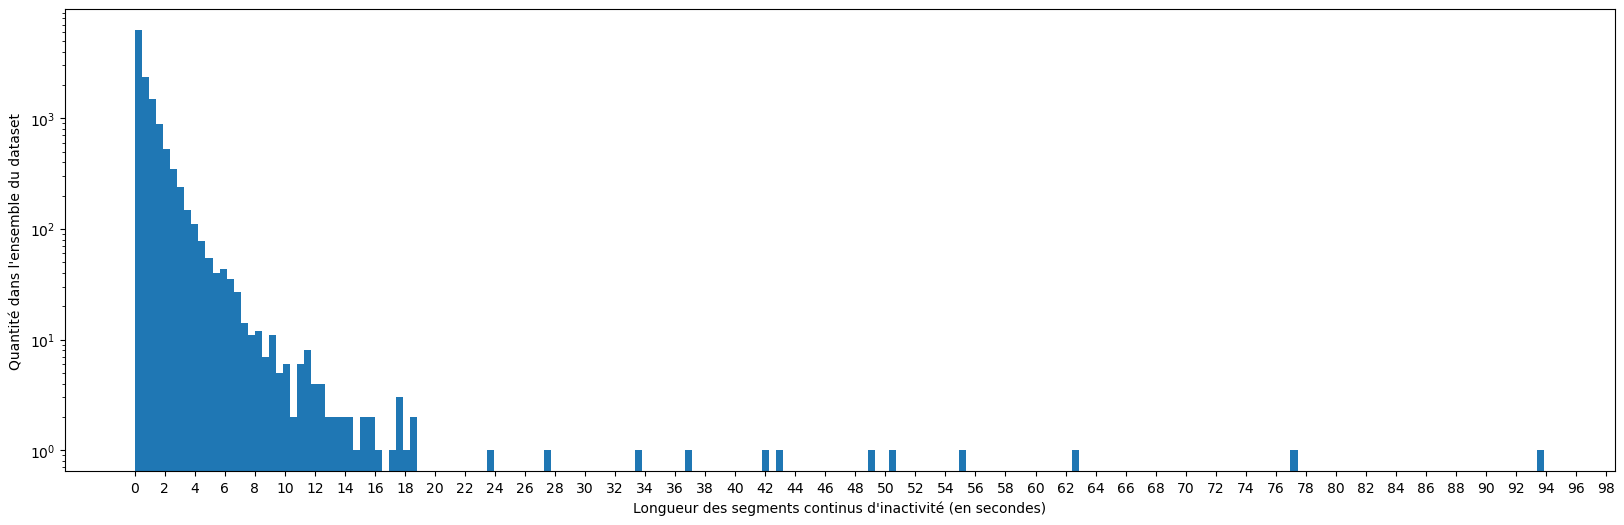

In [5]:
# x samples / (50 samples / sec) -> y sec
x = np.array(all_lengths) / 50
x = x[x < 100]
plt.figure(figsize=(20, 6))
plt.hist(x, bins=200)
plt.xticks(np.arange(0, 100, 2))
plt.yscale("log")
plt.xlabel("Longueur des segments continus d'inactivité (en secondes)")
plt.ylabel("Quantité dans l'ensemble du dataset")

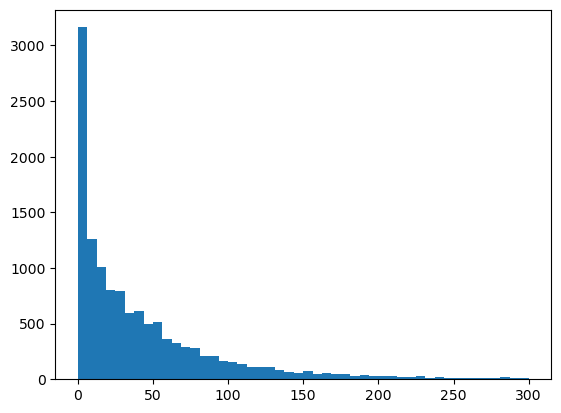

In [6]:
plt.hist(np.array(all_lengths), bins=np.linspace(0, 300, 49))
plt.show()

100%|██████████| 41/41 [00:19<00:00,  2.06it/s]
C:\Users\kupec\AppData\Local\Temp\ipykernel_12640\2253104335.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


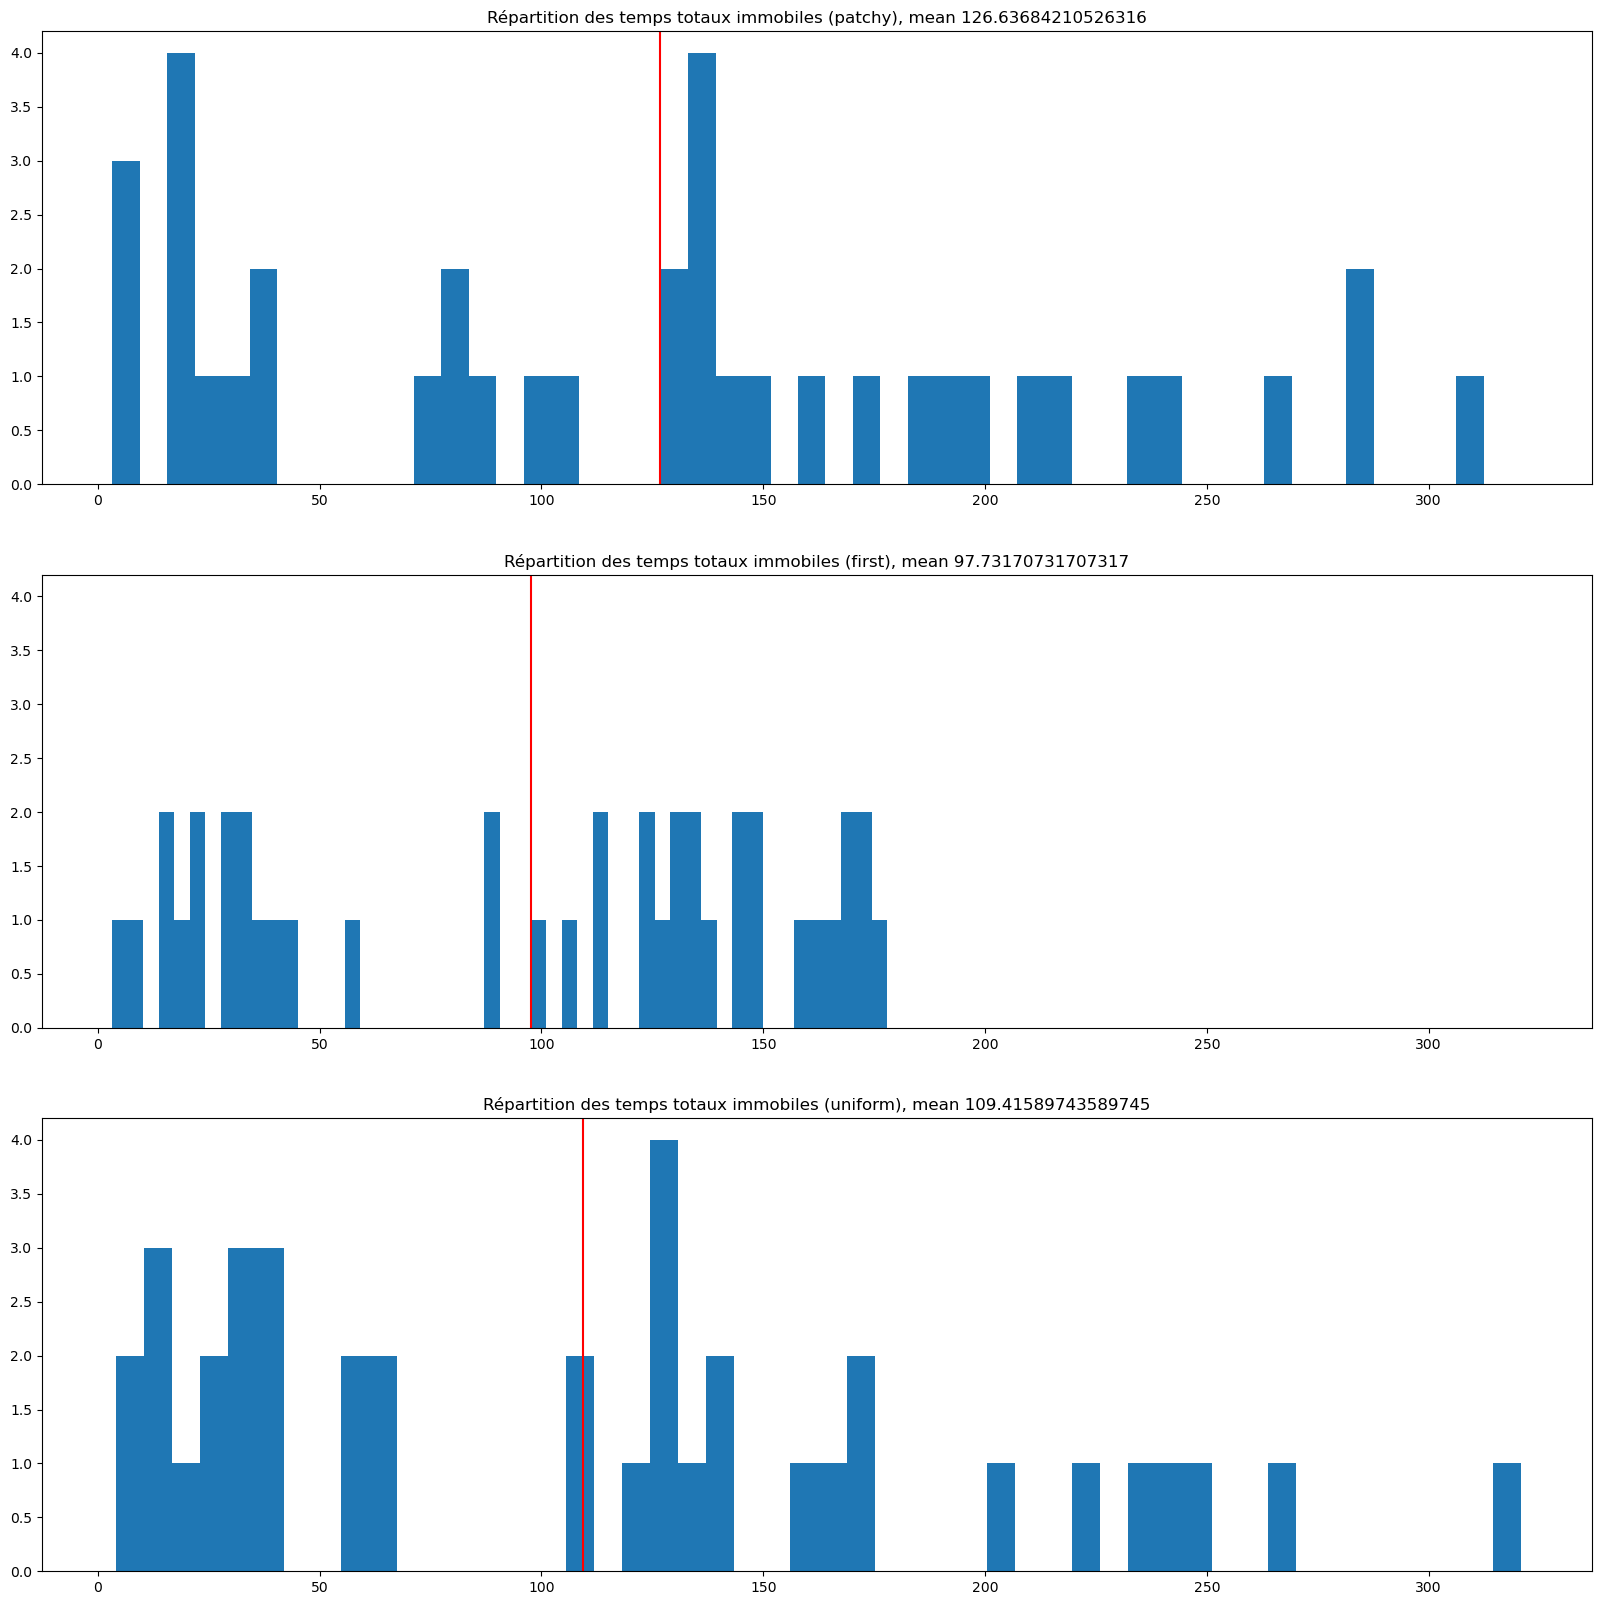

In [7]:
def compute_total_static_time(player_coords: List[TimeStampedCoordinates]):
    coords = to_vect([c["coord"] for c in player_coords])
    deriv = coords[1:] - coords[:-1]
    player_dist = np.linalg.norm(deriv, axis=1)
    return (player_dist == 0).sum() / 50  # 50 is the amount of samples / s


fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(20, 20))
for session_type, ax in zip(SESSION_TYPES, axs):
    all_static_times = []
    for sample in tqdm(dataloader):
        trial = sample[session_type]
        if trial is not None:
            all_static_times.append(compute_total_static_time(trial.player_coords))
    ax.hist(all_static_times, bins=50)
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
    ax.axvline(x=np.mean(all_static_times), color="red")
    ax.set_title(f"Répartition des temps totaux immobiles ({session_type}), mean {np.mean(all_static_times)}")
fig.show()
